---
title: "Group Assignment 1"
subtitle: "Group 11"
date: "2025-10-05"
format: pdf
---
\newpage
\tableofcontents
\listoftables
\listoffigures
\newpage

# Part I

In this part, we will analyze the stock data from four tickers: Starbucks (SBUX), Wendy's (WEN), Potbelly (PBPB), and Chipotle (CMG).

First, load the libraries that we will use in this assignment.

In [1038]:
library(dplyr)
library(ggplot2)
library(PerformanceAnalytics)
library(lubridate)
library(scales)

In [1039]:
data <- read.csv("compustat_food_bev.csv")

# Filter data for Starbucks (SBUX), Wendy's (WEN), Potbelly (PBPB), and Chipotle (CMG)
sbux_data <- filter(data, tic == "SBUX")
wen_data <- filter(data, tic == "WEN")
pbpb_data <- filter(data, tic == "PBPB")
cmg_data <- filter(data, tic == "CMG")

# Convert their datadate column to date type
sbux_data$datadate <- as.Date(sbux_data$datadate, format = "%d/%m/%Y")
wen_data$datadate <- as.Date(wen_data$datadate, format = "%d/%m/%Y")
pbpb_data$datadate <- as.Date(pbpb_data$datadate, format = "%d/%m/%Y")
cmg_data$datadate <- as.Date(cmg_data$datadate, format = "%d/%m/%Y")

## Question 1

In [1040]:
#1. Add a new column named daily_return for each stock
#   to store daily return value

#2. Drop the rows whose daily_return values are NA
sbux_data <- mutate(sbux_data, daily_return = (prccd - lag(prccd)) / lag(prccd))
sbux_data <- filter(sbux_data, !is.na(daily_return))

wen_data <- mutate(wen_data, daily_return = (prccd - lag(prccd)) / lag(prccd))
wen_data <- filter(wen_data, !is.na(daily_return))

pbpb_data <- mutate(pbpb_data, daily_return = (prccd - lag(prccd)) / lag(prccd))
pbpb_data <- filter(pbpb_data, !is.na(daily_return))

cmg_data <- mutate(cmg_data, daily_return = (prccd - lag(prccd)) / lag(prccd))
cmg_data <- filter(cmg_data, !is.na(daily_return))

## Question 2

In [1041]:
#1. Add a new column named momentum_10 for each stock
#   to store 10-day momentum value

#2. Drop the rows whose momentum_10 values are NA
sbux_data <- mutate(sbux_data, momentum_10 = prccd - lag(prccd, 10))
sbux_data <- filter(sbux_data, !is.na(momentum_10))

wen_data <- mutate(wen_data, momentum_10 = prccd - lag(prccd, 10))
wen_data <- filter(wen_data, !is.na(momentum_10))

pbpb_data <- mutate(pbpb_data, momentum_10 = prccd - lag(prccd, 10))
pbpb_data <- filter(pbpb_data, !is.na(momentum_10))

cmg_data <- mutate(cmg_data, momentum_10 = prccd - lag(prccd, 10))
cmg_data <- filter(cmg_data, !is.na(momentum_10))

## Question 3

In [1042]:
# Add a new column named daily_range for each stock
# to store daily range value
sbux_data <- mutate(sbux_data, daily_range = prchd - prcld)
wen_data <- mutate(wen_data, daily_range = prchd - prcld)
pbpb_data <- mutate(pbpb_data, daily_range = prchd - prcld)
cmg_data <- mutate(cmg_data, daily_range = prchd - prcld)

## Question 4

In [1043]:
# Add a new column named MFV for each stock
# to store money flow volume indicator value
sbux_data <- mutate(sbux_data,
        mfv = ((prccd - prcld) - (prchd - prccd)) * cshtrd / (prchd - prcld))

wen_data <- mutate(wen_data,
        mfv = ((prccd - prcld) - (prchd - prccd)) * cshtrd / (prchd - prcld))

pbpb_data <- mutate(pbpb_data, 
        mfv = ((prccd - prcld) - (prchd - prccd)) * cshtrd / (prchd - prcld))

cmg_data <- mutate(cmg_data, 
        mfv = ((prccd - prcld) - (prchd - prccd)) * cshtrd / (prchd - prcld))

Display the table for each stock containing only date and four new metrics columns.


In [1044]:
#| tbl-cap: "SBUX Data with New Metrics"

# SBUX
sbux_data_metrics <- filter(sbux_data[ ,
            c("datadate", "daily_return", "momentum_10", "daily_range", "mfv")])

head(sbux_data_metrics)

,datadate,daily_return,momentum_10,daily_range,mfv
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-17,-0.0184430867,-1.60,1.965,3099384.35
2,2020-09-18,-0.0207492795,-1.53,2.640,-7430383.71
3,2020-09-21,-0.0124779282,-2.38,2.200,6782798.69
4,2020-09-22,0.0007152223,-1.46,1.215,1229446.42
5,2020-09-23,-0.0114353782,-2.87,2.080,-5361087.23
6,2020-09-24,0.0006024822,-1.84,2.220,43793.63


In [1045]:
#| tbl-cap: "WEN Data with New Metrics"

# WEN
wen_data_metrics <- filter(wen_data[ ,
            c("datadate", "daily_return", "momentum_10", "daily_range", "mfv")])

head(wen_data_metrics)

,datadate,daily_return,momentum_10,daily_range,mfv
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-17,0.006631928,-0.720,0.625,1034602.5
2,2020-09-18,-0.013882353,-0.995,0.660,-3132449.7
3,2020-09-21,-0.014077786,-0.920,0.530,1294344.7
4,2020-09-22,0.019845111,-0.780,0.580,3259250.1
5,2020-09-23,-0.002847651,-1.485,0.640,-824321.2
6,2020-09-24,0.009043313,-0.650,0.790,320093.6


In [1046]:
#| tbl-cap: "PBPB Data with New Metrics"

# PBPB
pbpb_data_metrics <- filter(pbpb_data[ ,
            c("datadate", "daily_return", "momentum_10", "daily_range", "mfv")])

head(pbpb_data_metrics)

,datadate,daily_return,momentum_10,daily_range,mfv
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-17,-0.03747073,-0.30,0.2200,-26952.18
2,2020-09-18,0.04136253,0.11,0.3147,255757.31
3,2020-09-21,-0.07242991,-0.09,0.2100,-84781.00
4,2020-09-22,0.01511335,0.12,0.1200,217511.67
5,2020-09-23,-0.02481390,-0.02,0.1750,-82726.46
6,2020-09-24,-0.03562341,-0.34,0.2400,-54846.67


In [1047]:
#| tbl-cap: "CMG Data with New Metrics"

# CMG
cmg_data_metrics <- filter(cmg_data[ ,
             c("datadate", "daily_return", "momentum_10", "daily_range", "mfv")])

head(cmg_data_metrics)

,datadate,daily_return,momentum_10,daily_range,mfv
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-09-17,-0.031993807,-153.66,42.3600,-103314.12
2,2020-09-18,-0.008071032,-113.25,46.4200,-292595.13
3,2020-09-21,-0.007371573,-107.21,27.8099,280004.81
4,2020-09-22,0.023256970,-65.17,27.2700,123610.04
5,2020-09-23,0.011185990,-72.64,50.4911,-363145.20
6,2020-09-24,-0.015307716,-79.21,30.4063,-22833.32


## Question 5

In [1048]:
# Add a new column named month for each stock
sbux_data <- mutate(sbux_data, month = month(datadate))
wen_data <- mutate(wen_data, month = month(datadate))
pbpb_data <- mutate(pbpb_data, month = month(datadate))
cmg_data <- mutate(cmg_data, month = month(datadate))

## Question 6

In [1049]:
# Add a new column named year for each stock
sbux_data <- mutate(sbux_data, year = year(datadate))
wen_data <- mutate(wen_data, year = year(datadate))
pbpb_data <- mutate(pbpb_data, year = year(datadate))
cmg_data <- mutate(cmg_data, year = year(datadate))

## Question 7

In [1050]:
# Calculate the total trading volume (cshtrd) in June 2023 for each stock

# SBUX
sbux_trade_volume_2023_06 <- filter(sbux_data, year == 2023 & month == 6)
print(paste("Trading Volume for SBUX:", sum(sbux_trade_volume_2023_06$cshtrd)))

# WEN
wen_trade_volume_2023_06 <- filter(wen_data, year == 2023 & month == 6)
print(paste("Trading Volume for WEN :", sum(wen_trade_volume_2023_06$cshtrd)))

# PBPB
pbpb_trade_volume_2023_06 <- filter(pbpb_data, year == 2023 & month == 6)
print(paste("Trading Volume for PBPB:", sum(pbpb_trade_volume_2023_06$cshtrd)))

# CMG
cmg_trade_volume_2023_06 <- filter(cmg_data, year == 2023 & month == 6)
print(paste("Trading Volume for CMG :", sum(cmg_trade_volume_2023_06$cshtrd)))

[1] "Trading Volume for SBUX: 151045270"
[1] "Trading Volume for WEN : 54557454"
[1] "Trading Volume for PBPB: 6780601"
[1] "Trading Volume for CMG : 5392605"


## Question 8

In [1051]:
# Calculate the mean of daily return over the period for each stock

# SBUX
sbux_mean_daily_return <- mean(sbux_data$daily_return)
print(paste("Mean Daily Return for SBUX:", sbux_mean_daily_return))

# WEN
wen_mean_daily_return <- mean(wen_data$daily_return)
print(paste("Mean Daily Return for WEN :", wen_mean_daily_return))

# PBPB
pbpb_mean_daily_return <- mean(pbpb_data$daily_return)
print(paste("Mean Daily Return for PBPB:", pbpb_mean_daily_return))

# CMG
cmg_mean_daily_return <- mean(cmg_data$daily_return)
print(paste("Mean Daily Return for CMG :", cmg_mean_daily_return))

[1] "Mean Daily Return for SBUX: 0.000258033647537639"
[1] "Mean Daily Return for WEN : 0.000103435528595834"
[1] "Mean Daily Return for PBPB: 0.0013116077806262"
[1] "Mean Daily Return for CMG : 0.000789406041555275"


## Question 9

In [1052]:
# Find the date for maximum high price over the period for each stock

# SBUX
sbux_max_high_price <- max(sbux_data$prchd)
sbux_date_max_high_price <- filter(sbux_data, prchd == sbux_max_high_price)

print(paste("(SBUX)", "Date:", sbux_date_max_high_price$datadate,
            " Price:", sbux_max_high_price))

# WEN
wen_max_high_price <- max(wen_data$prchd)
wen_date_max_high_price <- filter(wen_data, prchd == wen_max_high_price)

print(paste("(WEN)", " Date:", wen_date_max_high_price$datadate,
            " Price:", wen_max_high_price))

# PBPB
pbpb_max_high_price <- max(pbpb_data$prchd)
pbpb_date_max_high_price <- filter(pbpb_data, prchd == pbpb_max_high_price)

print(paste("(PBPB)", "Date:", pbpb_date_max_high_price$datadate,
            " Price:", pbpb_max_high_price))

# CMG
cmg_max_high_price <- max(cmg_data$prchd)
cmg_date_max_high_price <- filter(cmg_data, prchd == cmg_max_high_price)

print(paste("(CMG)", " Date:", cmg_date_max_high_price$datadate,
             " Price:", cmg_max_high_price))

[1] "(SBUX) Date: 2021-07-23  Price: 126.32"
[1] "(WEN)  Date: 2021-06-08  Price: 29.46"
[1] "(PBPB) Date: 2023-04-26  Price: 11.14"
[1] "(CMG)  Date: 2023-07-19  Price: 2175.01"


## Question 10

In [1053]:
# Find the date for largest daily return over the period for each stock

# SBUX
sbux_max_daily_return <- max(sbux_data$daily_return)
sbux_date_max_daily_return <- filter(sbux_data, daily_return == sbux_max_daily_return)

print(paste("(SBUX)", "Date:", sbux_date_max_daily_return$datadate,
            " Daily Return:", sbux_max_daily_return))

# WEN
wen_max_daily_return <- max(wen_data$daily_return)
wen_date_max_daily_return <- filter(wen_data, daily_return == wen_max_daily_return)

print(paste("(WEN)", " Date:", wen_date_max_daily_return$datadate,
            " Daily Return:", wen_max_daily_return))

# PBPB
pbpb_max_daily_return <- max(pbpb_data$daily_return)
pbpb_date_max_daily_return <- filter(pbpb_data, daily_return == pbpb_max_daily_return)

print(paste("(PBPB)", "Date:", pbpb_date_max_daily_return$datadate,
            " Daily Return:", pbpb_max_daily_return))
# CMG
cmg_max_daily_return <- max(cmg_data$daily_return)
cmg_date_max_daily_return <- filter(cmg_data, daily_return == cmg_max_daily_return)

print(paste("(CMG)", " Date:", cmg_date_max_daily_return$datadate,
            " Daily Return:", cmg_max_daily_return))

[1] "(SBUX) Date: 2022-05-04  Daily Return: 0.0983452172743173"
[1] "(WEN)  Date: 2021-06-08  Daily Return: 0.258500435919791"
[1] "(PBPB) Date: 2021-03-15  Daily Return: 0.175862068965517"
[1] "(CMG)  Date: 2022-07-27  Daily Return: 0.147041620139316"


# Part II

## Question 1

# A tibble: 4 × 2
  exchg tic_num
  <int>   <int>
1    11      16
2    12       1
3    14      36
4    19       1


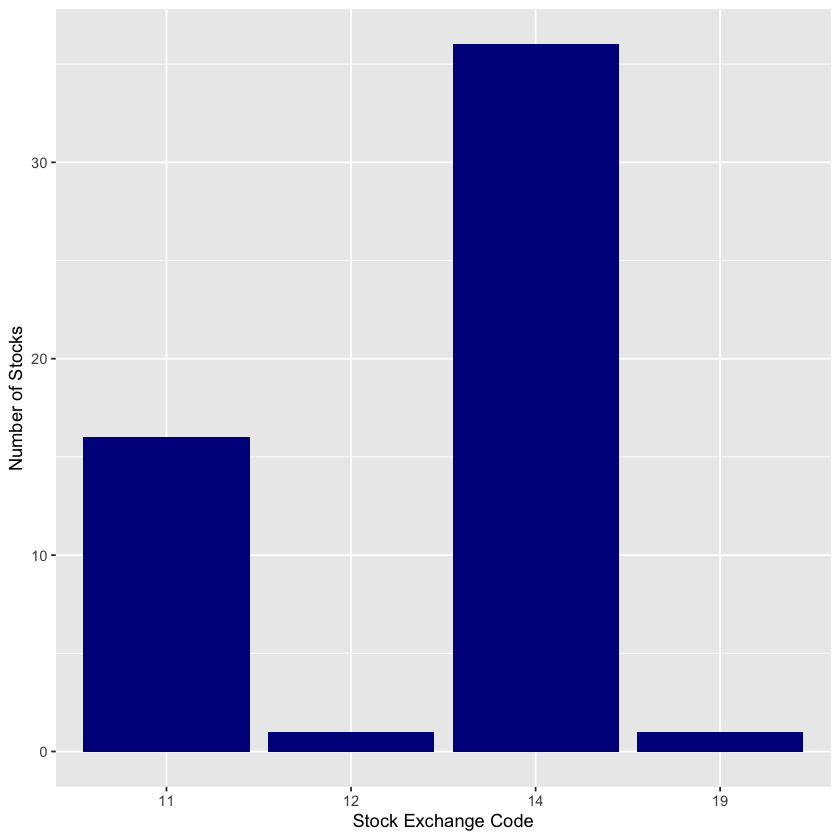

In [1054]:
#| fig-cap: "Number of Stocks on Each Exchange that had at least one Daily Trading Volume > 100,000"

#1. Find all the data with daily trading volume (cshtrd) > 100,000
#2. Group them by exchange and calulate the number of distinct tickers for each exchange
tickers_each_exchange <- data %>%
  filter(cshtrd > 100000) %>%
  group_by(exchg) %>%
  summarise(tic_num = n_distinct(tic))

# Demonstrate the calulating result table
print(tickers_each_exchange)

# Plot the result using column chart
ggplot(tickers_each_exchange, aes(factor(exchg), tic_num)) +
  geom_col(fill = "dark blue") +
  labs(x = "Stock Exchange Code", y = "Number of Stocks")

## Question 2

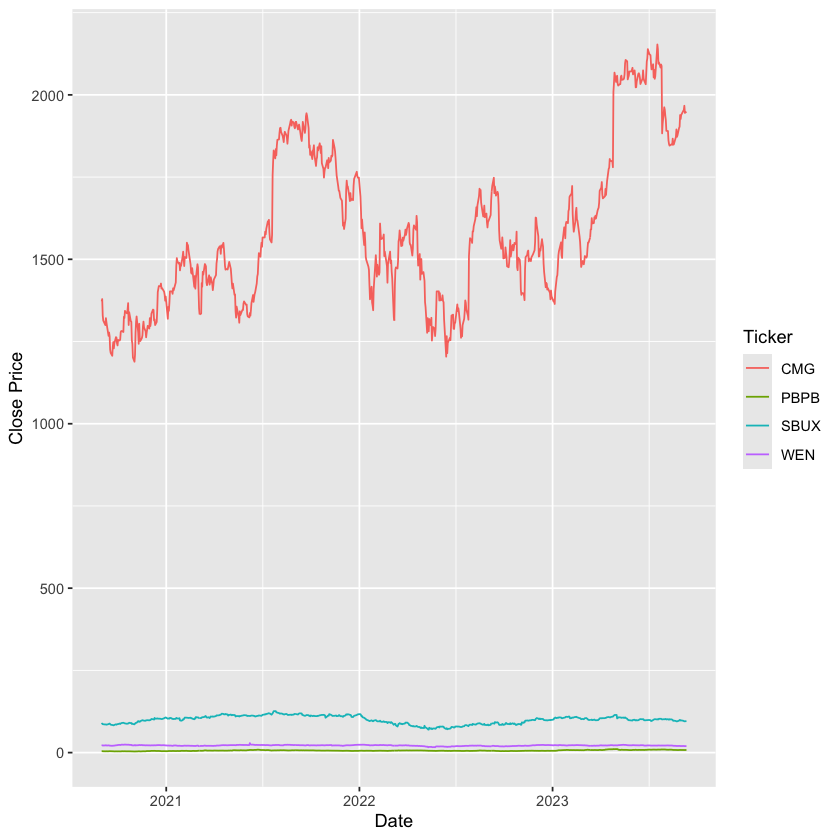

In [1055]:
#| fig-cap: "Close Price Trends"

# Filter the tickers we analyzed, including SBUX, WEN, PBPB, CMG
subset <- filter(data, tic == "SBUX" | tic == "WEN"
                 | tic == "PBPB" | tic == "CMG")

# Convert datadate to date format
subset$datadate <- as.Date(subset$datadate, format = "%d/%m/%Y")

# Plot the result using line plot
ggplot(subset, aes(datadate, prccd, colour = tic)) +
  geom_line() +
  labs(colour = "Ticker", x = "Date", y = "Close Price")

We can see that close price of CMG is far higher than the other three companies, making the line plot hard to read.
Therefore, we use facet_wrap to create separate plots for each ticker with free y scales

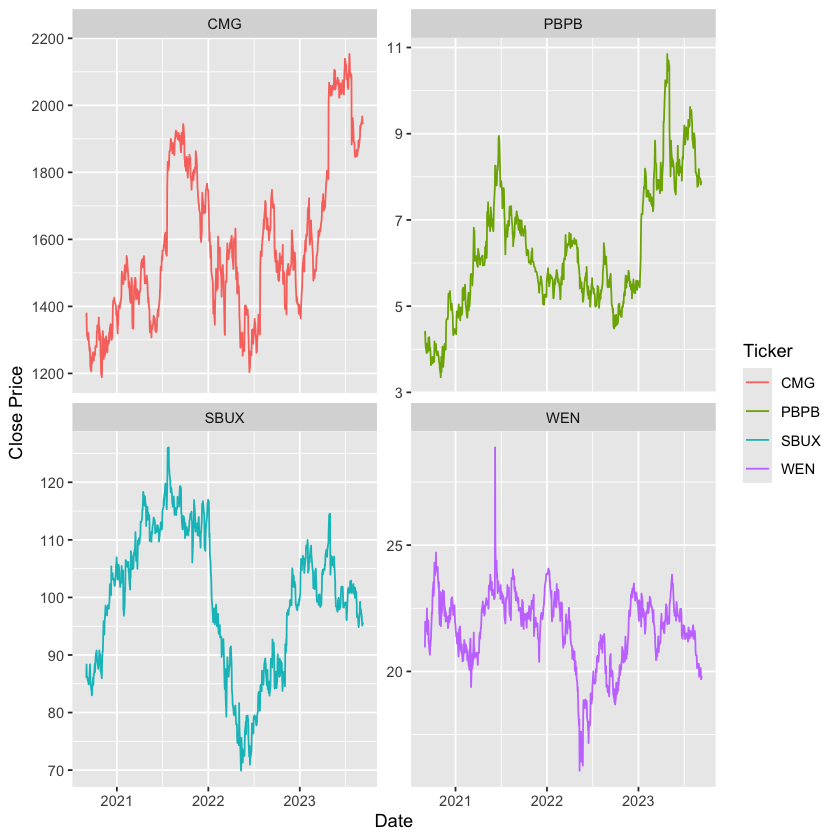

In [1056]:
#| fig-cap: "Close Price Trends with Facets"

ggplot(subset, aes(datadate, prccd, colour = tic)) +
  geom_line() +
  facet_wrap(~ tic, scales = "free_y") +
  labs(colour = "Ticker", x = "Date", y = "Close Price")

## Question 3

In [1057]:
# We have already calulated mean daily return for the tickers we analyzed before
# (from Part I Question 8)

# Demonstrate the calulating result again
print(paste("mean daily return for SBUX:", sbux_mean_daily_return))
print(paste("mean daily return for WEN :", wen_mean_daily_return))
print(paste("mean daily return for PBPB:", pbpb_mean_daily_return))
print(paste("mean daily return for CMG :", cmg_mean_daily_return))

[1] "mean daily return for SBUX: 0.000258033647537639"
[1] "mean daily return for WEN : 0.000103435528595834"
[1] "mean daily return for PBPB: 0.0013116077806262"
[1] "mean daily return for CMG : 0.000789406041555275"


Apparnetly, PBPB has the highest mean daily return among the four tickers.
Let's visualize the high and low prices of PBPB in 2021.

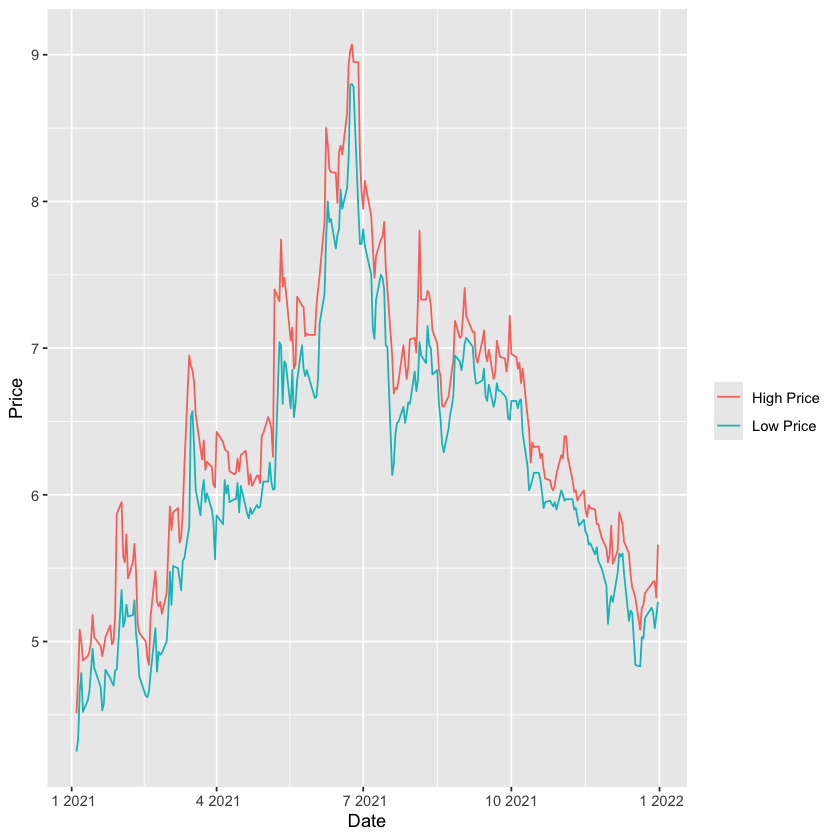

In [1058]:
#| fig-cap: "PBPB High Price & Low Price in 2021"

# Convert datadate to date format
pbpb_data$datadate <- as.Date(pbpb_data$datadate, format = "%d/%m/%Y")

# Filter all the PBPB data in 2021
pbpb_data_2021 <- filter(pbpb_data, year(pbpb_data$datadate) == 2021)

# Plot high and low prices using line plot
ggplot(pbpb_data_2021, aes(datadate, prchd, colour = "High Price")) +
  geom_line() +
  geom_line(aes(datadate, prcld, colour = "Low Price")) +
  labs(colour = "", x = "Date", y = "Price")

## Question 4

# A tibble: 4 × 2
   year   volume
  <dbl>    <int>
1  2020 10051249
2  2021 28658498
3  2022  9150412
4  2023 32188643


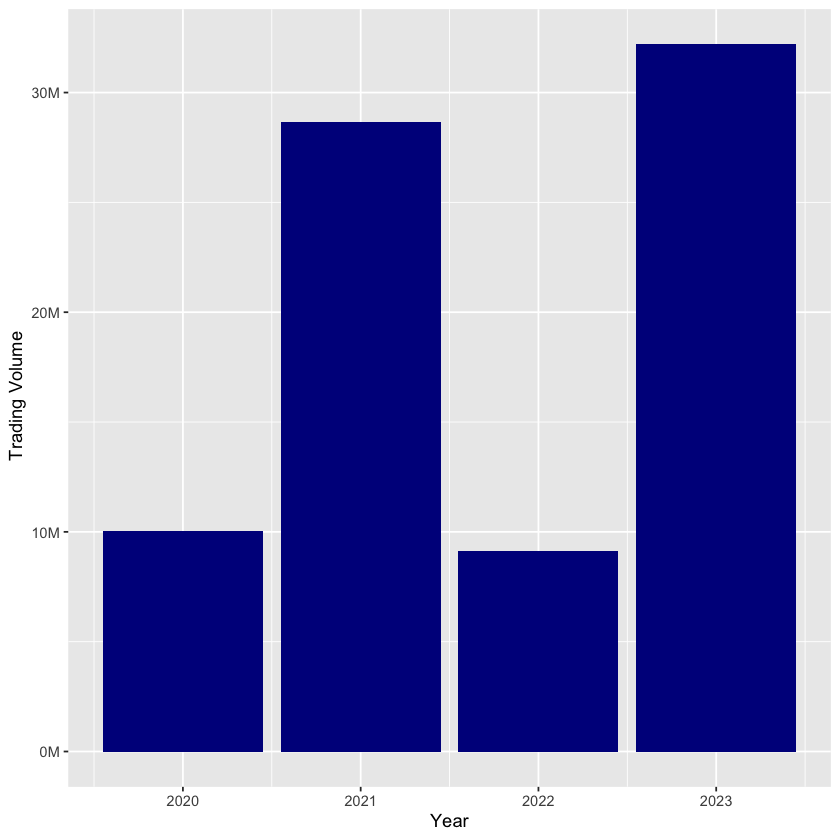

In [1059]:
#| fig-cap: "Trading Volume for PBPB from 2020 to 2023"

#1. Add a new column called year to pbpb_data to represent the year of each observation
#2. Group the pbpb_data by year and calculate the annual trading volume (cshtrd) for each year
annual_volume <- pbpb_data %>%
  mutate(year = year(datadate)) %>%
  group_by(year) %>%
  summarise(volume = sum(cshtrd))

# Demonstrate the calulating result table
print(annual_volume)

# Plot the result using column chart
# We add scale_y_continuous to make y axis labels more readable
# by scaling down the numbers and adding "M" suffix to represent million
ggplot(annual_volume, aes(year, volume)) +
  geom_col(fill = "dark blue") +
  scale_y_continuous(labels = label_number(scale = 1e-6, suffix = "M")) +
  labs(x = "Year", y = " Trading Volume")

## Question 5

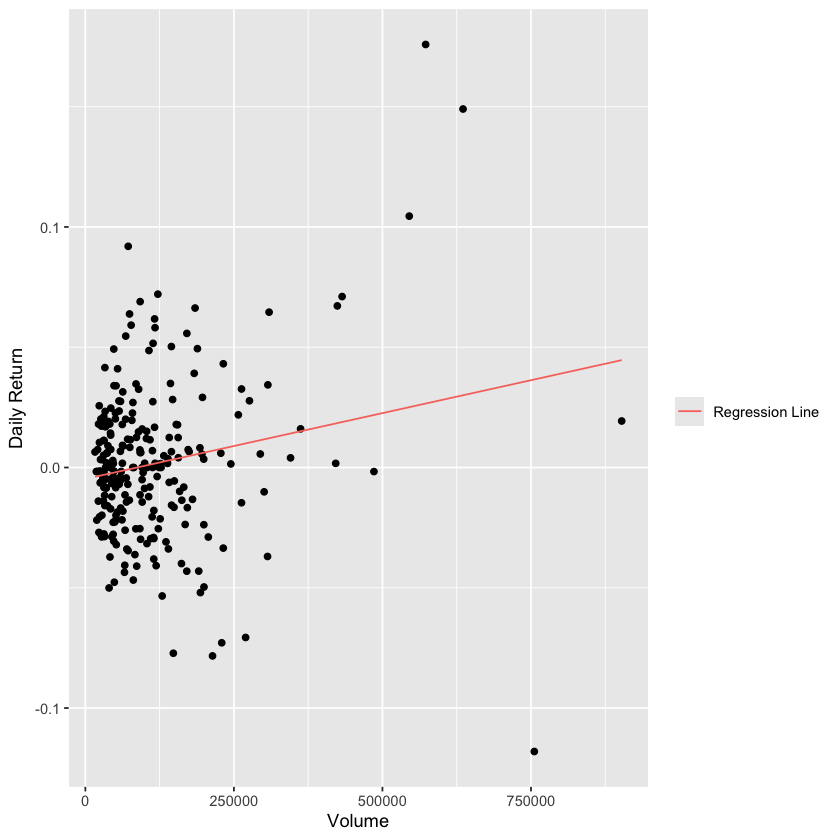

In [1060]:
#| fig-cap: "Relationship between daily returns and volume in 2021."

# Add a new column called model to pbpb_data_2021 
# to store the predicted daily return values
lm_return_volume  <- lm(formula = daily_return ~ cshtrd, data = pbpb_data_2021)
pbpb_data_2021$model <- predict(lm_return_volume)

# Plot a scatter plot with regression line
ggplot(pbpb_data_2021, aes(cshtrd, daily_return)) +
  geom_point() +
  geom_line(aes(y = model, colour = "Regression Line")) +
  labs(colour = "", x = "Volume", y = "Daily Return")